<a href="https://colab.research.google.com/github/dubeyaayush07/Dominant_Color_Identification/blob/master/Dominant_Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import requests, zipfile, io

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def download_and_extract(url, dest_folder):
  r = requests.get(url)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall(dest_folder)

In [ ]:
dest_folder = './colors'

In [ ]:
url_list = ['https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/black+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/white+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/grey+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/brown+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/green+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/blue+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/yellow+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/orange+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/red+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/purple+color.zip',
            'https://cvhci.anthropomatik.kit.edu/~bschauer/datasets/google-512/orig/pink+color.zip']

In [ ]:
download_and_extract(url_list[10], dest_folder)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(dest_folder, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black+color',
 'blue+color',
 'brown+color',
 'green+color',
 'grey+color',
 'orange+color',
 'pink+color',
 'purple+color',
 'red+color',
 'white+color',
 'yellow+color']

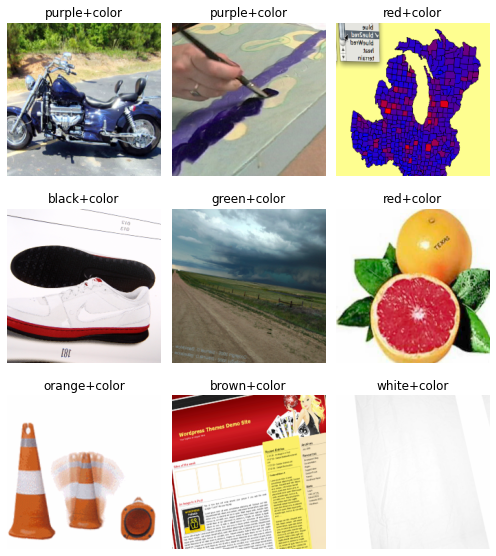

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.027965,2.201834,0.650977,02:05
1,2.356446,1.933944,0.603908,02:02
2,1.922222,1.776937,0.549734,02:02
3,1.620579,1.761182,0.551510,01:59


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


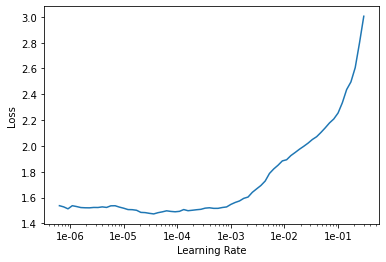

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.549065,1.718781,0.526643,02:06
1,1.309060,1.685292,0.519538,02:07


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (4506 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green+color,green+color,green+color,green+color,green+color
Path: colors;

Valid: LabelList (1126 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
brown+color,blue+color,brown+color,blue+color,pink+color
Path: colors;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

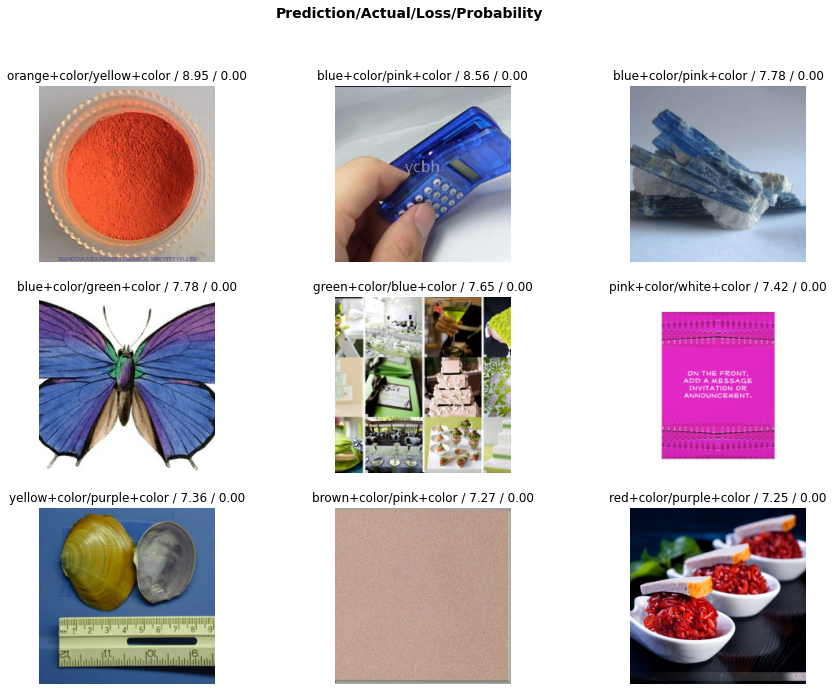

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


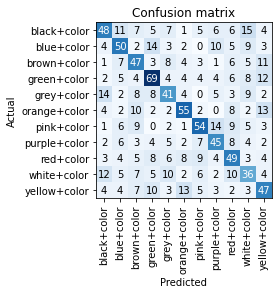

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('black+color', 'white+color', 15),
 ('blue+color', 'green+color', 14),
 ('grey+color', 'black+color', 14),
 ('pink+color', 'purple+color', 14),
 ('orange+color', 'yellow+color', 13),
 ('yellow+color', 'orange+color', 13),
 ('green+color', 'yellow+color', 12),
 ('white+color', 'black+color', 12),
 ('black+color', 'blue+color', 11),
 ('brown+color', 'yellow+color', 11),
 ('blue+color', 'purple+color', 10),
 ('orange+color', 'brown+color', 10),
 ('white+color', 'grey+color', 10),
 ('white+color', 'red+color', 10),
 ('yellow+color', 'green+color', 10),
 ('blue+color', 'white+color', 9),
 ('grey+color', 'white+color', 9),
 ('pink+color', 'brown+color', 9),
 ('pink+color', 'red+color', 9),
 ('red+color', 'pink+color', 9),
 ('brown+color', 'grey+color', 8),
 ('green+color', 'white+color', 8),
 ('grey+color', 'brown+color', 8),
 ('grey+color', 'green+color', 8),
 ('orange+color', 'red+color', 8),
 ('purple+color', 'red+color', 8),
 ('red+color', 'green+color', 8),
 ('red+color', 'orange+colo

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.164358,1.686209,0.513322,02:06


In [ ]:
learn.save('stage-3')

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(dest_folder, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,2.997472,2.364167,0.365897,02:17
1,2.412909,2.063858,0.395204,02:15
2,1.967743,1.859300,0.432504,02:13
3,1.646723,1.773447,0.461812,02:16
4,1.440040,1.763896,0.458259,02:15
5,1.234733,1.745197,0.466252,02:16
6,1.107099,1.722227,0.468028,02:15
7,1.015857,1.720308,0.475133,02:15


In [ ]:
learn.save('stage-4')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


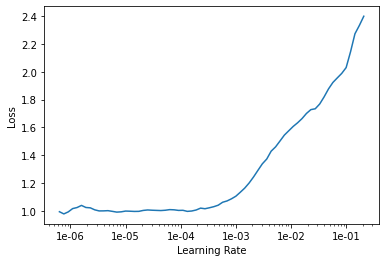

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.101359,1.803633,0.463588,02:26
1,0.914254,1.755713,0.476021,02:24


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

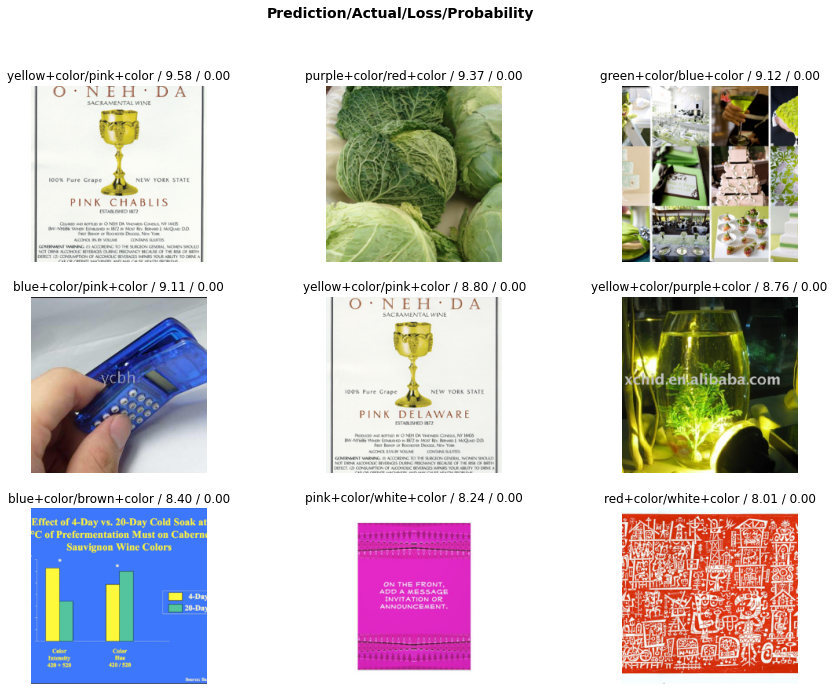

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))